In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [117]:
# Load dataset
df = pd.read_excel(r"/Users/yusufkhan/Desktop/data analytics/Assessment/ML Advanced Exam Paper/Dataset/Flight Price Dataset/Flight_Price_Train.xlsx")


In [119]:
print("Top 5 Records:\n", df.head())
print("\nShape of Data:", df.shape)
print("\nColumns in Data:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nStatistical Summary:\n", df.describe())


Top 5 Records:
        Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  

Shape of Data: (10683, 11)

Columns in Data: Index(['Airline', 'Date_of_Journey', 

In [121]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [123]:
# Extract date features (assuming 'Date_of_Journey' exists)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
df.drop(columns=['Date_of_Journey'], inplace=True)

In [125]:
most_preferred_airline = df["Airline"].value_counts()
print("\nMost Preferred Airline:\n", most_preferred_airline)


Most Preferred Airline:
 Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


In [127]:
#majority of the flights take off from which source
most_common_source = df["Source"].value_counts()
print("\nMost Common Source:\n", most_common_source)


Most Common Source:
 Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64


In [129]:
 #maximum flights land in which destination
most_common_destination = df["Destination"].value_counts()
print("\nMost Common Destination:\n", most_common_destination)


Most Common Destination:
 Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


In [131]:
#Which airline has the highest price
avg_price_per_airline = df.groupby("Airline")["Price"].mean().sort_values(ascending=False)
print("\nAirline with Highest Price:\n", avg_price_per_airline)


Airline with Highest Price:
 Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9556.608028
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64


In [133]:
#Checking if the business class flights are high price or low and find only those flights which price is higher than 50k
high_price_flights = df[df['Price'] > 50000]
print("\nFlights with Price > 50k:\n", high_price_flights)


Flights with Price > 50k:
                     Airline    Source Destination                  Route  \
657    Jet Airways Business  Banglore   New Delhi        BLR → BOM → DEL   
1478            Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
2618            Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
2924   Jet Airways Business  Banglore   New Delhi        BLR → BOM → DEL   
5372   Jet Airways Business  Banglore   New Delhi        BLR → BOM → DEL   
5439            Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
9715   Jet Airways Business     Delhi      Cochin  DEL → ATQ → BOM → COK   
10364  Jet Airways Business  Banglore   New Delhi        BLR → MAA → DEL   

      Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Day  \
657      05:45         10:45       5h      1 stop         No info  52229    1   
1478     18:40  00:45 16 Mar    6h 5m      1 stop         No info  54826   18   
2618     22:50  05:05 16 Mar   6h 15m      1

In [135]:
# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

In [137]:
# Split data into features and target
X = df.drop(columns=['Price'])  # Assuming 'Price' is the target column
y = df['Price']

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

In [143]:
# Initializing results DataFrame
Results = pd.DataFrame(columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R2_score', 'RMSLE', 'MAPE', 'Adj_R2'])

In [145]:
# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    rmsle = np.log(rmse) if rmse > 0 else 0

    # MAPE Calculation
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Adjusted R² Calculation
    n, p = X.shape  # n = rows, p = features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Store results in DataFrame
    new_row = pd.DataFrame([{
        'Model Name': name,
        'MAE': round(mae, 3),
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3),
        'R2_score': round(r2, 6),
        'RMSLE': round(rmsle, 3),
        'MAPE': f"{round(mape, 2)} %",
        'Adj_R2': round(adj_r2, 6)
    }])
    
    Results = pd.concat([Results, new_row], ignore_index=True)


In [147]:
# Print results in the required format
for _, row in Results.iterrows():
    print(f"Model Name:  {row['Model Name']}")
    print(f"Mean Absolute Error (MAE): {row['MAE']}")
    print(f"Mean Squared Error (MSE): {row['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {row['RMSE']}")
    print(f"R2_score: {row['R2_score']}")
    print(f"Root Mean Squared Log Error (RMSLE): {row['RMSLE']}")
    print(f"Mean Absolute Percentage Error (MAPE): {row['MAPE']}")
    print(f"Adj R Square: {row['Adj_R2']}")
    print('-' * 100)

# Display Results DataFrame
print(Results)

Model Name:  LinearRegression
Mean Absolute Error (MAE): 146035898590.718
Mean Squared Error (MSE): 1.2163398237910866e+24
Root Mean Squared Error (RMSE): 1102877973209.678
R2_score: -5.833686814242274e+16
Root Mean Squared Log Error (RMSLE): 27.729
Mean Absolute Percentage Error (MAPE): 2166082580.12 %
Adj R Square: -7.29280566010856e+16
----------------------------------------------------------------------------------------------------
Model Name:  DecisionTree
Mean Absolute Error (MAE): 661.453
Mean Squared Error (MSE): 2760711.017
Root Mean Squared Error (RMSE): 1661.539
R2_score: 0.867594
Root Mean Squared Log Error (RMSLE): 7.415
Mean Absolute Percentage Error (MAPE): 7.52 %
Adj R Square: 0.834476
----------------------------------------------------------------------------------------------------
Model Name:  RandomForest
Mean Absolute Error (MAE): 602.804
Mean Squared Error (MSE): 2115637.348
Root Mean Squared Error (RMSE): 1454.523
R2_score: 0.898532
Root Mean Squared Log Error

In [149]:
# Sort models by highest R² score (best performance)
best_model = Results.sort_values(by='R2_score', ascending=False).head(1)

print("Best Performing Model:")
print(best_model)

Best Performing Model:
     Model Name      MAE          MSE      RMSE  R2_score  RMSLE   MAPE  \
2  RandomForest  602.804  2115637.348  1454.523  0.898532  7.282  6.9 %   

     Adj_R2  
2  0.873153  


In [153]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [155]:
print(type(best_model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [157]:
# Load the test dataset
df_test = pd.read_excel(r"/Users/yusufkhan/Desktop/data analytics/Assessment/ML Advanced Exam Paper/Dataset/Flight Price Dataset/Flight_Price_Test.xlsx")


In [159]:
# Handle missing values
df_test.dropna(inplace=True)

In [161]:
# Convert 'Date_of_Journey' column to datetime format (fixing the issue)
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], dayfirst=True, errors='coerce')

# Extract date features
df_test['Day'] = df_test['Date_of_Journey'].dt.day
df_test['Month'] = df_test['Date_of_Journey'].dt.month
df_test['Year'] = df_test['Date_of_Journey'].dt.year

# Drop the original date column
df_test.drop(columns=['Date_of_Journey'], inplace=True)

In [163]:
# Encode categorical features (ensure same encoding as training data)
categorical_features = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']

for col in categorical_features:
    if col in df_test.columns:
        df_test[col] = LabelEncoder().fit_transform(df_test[col])

In [165]:
# Align test data columns with training data
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing columns as zero

In [167]:
df_test = df_test[X_train.columns]

In [169]:
df_test

,Day,Month,Year,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,6,6,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,5,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,5,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,5,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,6,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,6,6,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2667,27,3,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,6,3,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2669,6,3,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
test_predictions = best_model.predict(df_test)

In [173]:
print("Flight Price Predictions:\n", test_predictions)

Flight Price Predictions:
 [ 6873.23  6463.52  6831.05 ... 11938.18 11938.18  6320.51]


In [175]:
df_test2=pd.read_excel(r"/Users/yusufkhan/Desktop/data analytics/Assessment/ML Advanced Exam Paper/Dataset/Flight Price Dataset/Flight_Price_Test.xlsx")

In [177]:
df_test2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [179]:
df_test2['Predicted_Price'] = test_predictions

In [181]:
df_test2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted_Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6873.23
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,6463.52
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,6831.05
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,6831.05
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6215.38
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6873.23
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,6047.18
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,11938.18
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,11938.18


# RFM

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from itertools import combinations
pd.options.mode.chained_assignment = None

In [37]:
data = pd.read_table(r"/Users/yusufkhan/Desktop/data analytics/Assessment/ML Advanced Exam Paper/Dataset/RFM Dataset/RFM data.csv",delimiter=",")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.isnull().sum()

In [ ]:
data.describe(include="all")

In [ ]:
data.info()

In [ ]:
for i in data.columns:
    print({i:data[i].unique()})

In [39]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [41]:
reference_date = data["InvoiceDate"].max()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm_table["Frequency"], y=rfm_table["Monetary"])
plt.title("Frequency vs Monetary (Customer Spending Behavior)")
plt.xlabel("Number of Transactions (Frequency)")
plt.ylabel("Total Spending (Monetary)")
plt.show()

## Recency vs Frequency (Scatter Plot)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm_table["Recency"], y=rfm_table["Frequency"])
plt.title("Recency vs Frequency (Customer Engagement)")
plt.xlabel("Days Since Last Purchase (Recency)")
plt.ylabel("Number of Transactions (Frequency)")
plt.show()

# RECENCY

In [43]:
recency = data.groupby("CustomerID")["InvoiceDate"].max().reset_index()
print(recency)
recency["Recency"] = (reference_date - recency["InvoiceDate"]).dt.days


      CustomerID         InvoiceDate
0        12347.0 2011-12-07 15:52:00
1        12348.0 2011-09-25 13:13:00
2        12349.0 2011-11-21 09:51:00
3        12350.0 2011-02-02 16:01:00
4        12352.0 2011-11-03 14:37:00
...          ...                 ...
4293     18280.0 2011-03-07 09:52:00
4294     18281.0 2011-06-12 10:53:00
4295     18282.0 2011-12-02 11:43:00
4296     18283.0 2011-12-06 12:02:00
4297     18287.0 2011-10-28 09:29:00

[4298 rows x 2 columns]


# Frequency

In [45]:
frequency = data.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
print(frequency)
frequency.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)


      CustomerID  InvoiceNo
0        12347.0          7
1        12348.0          4
2        12349.0          1
3        12350.0          1
4        12352.0          7
...          ...        ...
4293     18280.0          1
4294     18281.0          1
4295     18282.0          2
4296     18283.0         16
4297     18287.0          3

[4298 rows x 2 columns]


# Monetary

In [47]:
monetary = data.groupby("CustomerID")["TotalPrice"].sum().reset_index()
print(monetary)
monetary.rename(columns={"TotalPrice": "Monetary"}, inplace=True)

      CustomerID  TotalPrice
0        12347.0     4060.40
1        12348.0     1437.24
2        12349.0     1417.60
3        12350.0      294.40
4        12352.0     1385.74
...          ...         ...
4293     18280.0      180.60
4294     18281.0       80.82
4295     18282.0      178.05
4296     18283.0     2088.93
4297     18287.0     1837.28

[4298 rows x 2 columns]


In [49]:
rfm_table = recency.merge(frequency, on="CustomerID").merge(monetary, on="CustomerID")

# Display the first few rows of the RFM table
print(rfm_table.head())

   CustomerID         InvoiceDate  Recency  Frequency  Monetary
0     12347.0 2011-12-07 15:52:00        1          7   4060.40
1     12348.0 2011-09-25 13:13:00       74          4   1437.24
2     12349.0 2011-11-21 09:51:00       18          1   1417.60
3     12350.0 2011-02-02 16:01:00      309          1    294.40
4     12352.0 2011-11-03 14:37:00       35          7   1385.74


In [51]:
# Assign scores for Recency (Lower is better)
rfm_table["R_Score"] = pd.cut(
    rfm_table["Recency"], 
    bins=[0, 30, 60, 90, 180, 365], 
    labels=[1, 2, 3, 4, 5], 
    right=True
)

# Assign scores for Frequency (Higher is better)
rfm_table["F_Score"] = pd.qcut(
    rfm_table["Frequency"].rank(method="first"), 
    q=5, 
    labels=[5, 4, 3, 2, 1]  
)

# Assign scores for Monetary (Higher is better)
rfm_table["M_Score"] = pd.qcut(
    rfm_table["Monetary"].rank(method="first"), 
    q=5, 
    labels=[5, 4, 3, 2, 1]  
)

# Display the updated RFM table with scores
print(rfm_table.head())

   CustomerID         InvoiceDate  Recency  Frequency  Monetary R_Score  \
0     12347.0 2011-12-07 15:52:00        1          7   4060.40       1   
1     12348.0 2011-09-25 13:13:00       74          4   1437.24       3   
2     12349.0 2011-11-21 09:51:00       18          1   1417.60       1   
3     12350.0 2011-02-02 16:01:00      309          1    294.40       5   
4     12352.0 2011-11-03 14:37:00       35          7   1385.74       2   

  F_Score M_Score  
0       1       1  
1       2       2  
2       5       2  
3       5       4  
4       1       2  


In [55]:
rfm_table.isnull().sum()

# Fill missing RFM scores with the most common value (mode)
rfm_table["R_Score"] = rfm_table["R_Score"].fillna(rfm_table["R_Score"].mode()[0])
rfm_table["F_Score"] = rfm_table["F_Score"].fillna(rfm_table["F_Score"].mode()[0])
rfm_table["M_Score"] = rfm_table["M_Score"].fillna(rfm_table["M_Score"].mode()[0])

# Convert to integer (as they are categorical scores)
rfm_table["R_Score"] = rfm_table["R_Score"].astype(int)
rfm_table["F_Score"] = rfm_table["F_Score"].astype(int)
rfm_table["M_Score"] = rfm_table["M_Score"].astype(int)


In [57]:
def segment_customer(row):
    r, f, m = row["R_Score"], row["F_Score"], row["M_Score"]

    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Loyal Customers"
    elif r >= 4 and 2 <= f <= 3 and 2 <= m <= 3:
        return "Potential Loyalists"
    elif r >= 4 and f <= 2 and m <= 2:
        return "Recent Customers"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Needs Attention"
    elif r <= 2 and f <= 2 and m <= 2:
        return "Hibernating"
    elif r >= 2 and f <= 3 and m <= 3:
        return "At Risk"
    elif r <= 3 and f >= 4 and m >= 4:
        return "Can't Lose Them"
    else:
        return "Other"


In [59]:
rfm_table["Segment"] = rfm_table.apply(segment_customer, axis=1)
print(rfm_table[["CustomerID", "R_Score", "F_Score", "M_Score", "Segment"]].head())

   CustomerID  R_Score  F_Score  M_Score      Segment
0     12347.0        1        1        1  Hibernating
1     12348.0        3        2        2      At Risk
2     12349.0        1        5        2        Other
3     12350.0        5        5        4    Champions
4     12352.0        2        1        2  Hibernating


/var/folders/3d/6161zfvj2wv_8m4q9rfjsw940000gn/T/ipykernel_87384/1126252731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rfm_table["Segment"], order=rfm_table["Segment"].value_counts().index, palette="viridis")


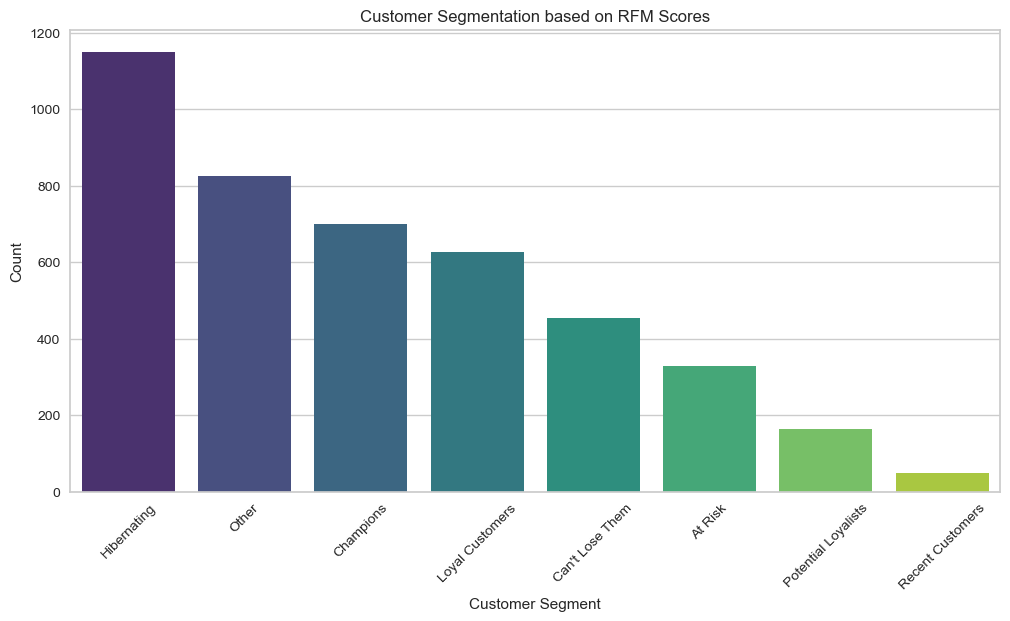

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of customer segments
plt.figure(figsize=(12, 6))
sns.countplot(x=rfm_table["Segment"], order=rfm_table["Segment"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Customer Segmentation based on RFM Scores")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()